In [13]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def logToBytes(name):
    file = open(name)
    comments = 0
    while True:
        line = file.readline()
        if not line:
            break
        elif line.startswith('#'):
            comments += 1
        else:
            arr = line.strip().split(',')
            for i in range(0,len(arr)-1):
                bt = int(arr[i])
                if bt < 0:
                    yield 256+bt
                else:
                    yield bt
    print("# of comments: "+str(comments))

In [4]:
files = ['0','1','2','3','4','8','16']

def calculateEntropy(name):
    bts = np.fromiter(logToBytes('../resources/logs/'+name+'.log'), int)
    prob = stats.itemfreq(bts)[:,1]/len(bts)
    return -np.sum(prob*np.log2(prob))

In [11]:
x = np.zeros(len(files))
y = np.zeros(len(files))

for i in range(0,len(files)):
    x[i] = int(files[i])
    y[i] = calculateEntropy(files[i])


# of comments: 2796
# of comments: 2796
# of comments: 2796
# of comments: 2796
# of comments: 2796
# of comments: 2796
# of comments: 2796


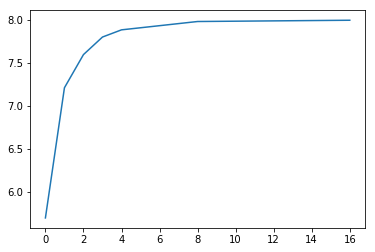

In [14]:
plt.figure(1)
plt.plot(x,y)